In [36]:
import numpy as np
import pathlib
import json
import pylab as plt
import seaborn as sns; sns.set()

In [37]:
data = []

with open('/private/home/kharitonov/work/EGG/egg/zoo/language_bottleneck/explain/ig_2.json', 'r') as fin:
    for line in fin:
        data.append(json.loads(line))

In [38]:
filtered = []

for l in data:
    if l['receiver_cell'] != 'gru' or l['sender_cell'] != 'gru':
        continue
    filtered.append(l)
print(len(l))

38


In [39]:
xs = [11, 21, 31]
vocab_sizes = [8, 16, 24]

results = dict((z, []) for z in vocab_sizes)

for vocab_size in vocab_sizes:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['vocab_size'] == vocab_size]
        info_gap = [x['mean_information_gap'] for x in slice]
        
        
        results[vocab_size].append((np.mean(info_gap), np.std(info_gap) / len(info_gap)))

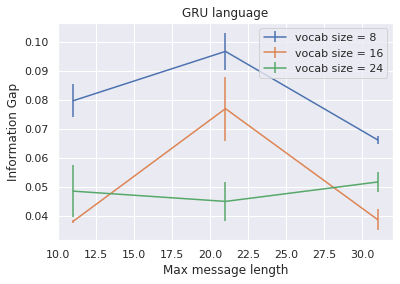

In [40]:
for vocab_size in vocab_sizes:
    means, std = [x[0] for x in results[vocab_size]], [x[1] for x in results[vocab_size]]
    
    plt.errorbar(xs, means, yerr=std, label=f'vocab size = {vocab_size}')
    
plt.ylabel('Information Gap')
plt.xlabel('Max message length')
plt.title("GRU language")
plt.legend()
plt.savefig("gru_information_gap.pdf")
plt.show()


In [67]:
data = []

with open('/private/home/kharitonov/work/EGG/egg/zoo/language_bottleneck/explain/discr.json', 'r') as fin:
    for line in fin:
        data.append(json.loads(line))

In [71]:
data[0]

{'n_bits': 8,
 'bits_s': 8,
 'bits_r': 0,
 'n_examples_per_epoch': 2048000,
 'sender_hidden': 10,
 'receiver_hidden': 10,
 'temperature': 1.0,
 'sender_entropy_coeff': 0.01,
 'receiver_entropy_coeff': 0.01,
 'sender_lr': 0.001,
 'receiver_lr': 0.001,
 'discriminator_weight': 0.1,
 'mode': 'rf',
 'variable_length': True,
 'sender_cell': 'factorized',
 'receiver_cell': 'gru',
 'sender_emb': 10,
 'receiver_emb': 10,
 'early_stopping_thr': 0.99,
 'dump_language': False,
 'random_seed': 0,
 'checkpoint_dir': '/private/home/kharitonov/nest/guess_number/2019_09_04_10_37_05',
 'preemptable': True,
 'checkpoint_freq': 1,
 'validation_freq': 1,
 'n_epochs': 1000,
 'load_from_checkpoint': None,
 'no_cuda': False,
 'batch_size': 2048,
 'optimizer': 'adam',
 'lr': 0.001,
 'vocab_size': 8,
 'max_len': 11,
 'tensorboard': False,
 'tensorboard_dir': 'runs/',
 'cuda': True,
 'device': 'cuda',
 'mean_information_gap': 0.4650791585445404,
 'name': '17406128_0'}

In [72]:
filtered = []

for l in data:
    if l['receiver_cell'] != 'gru' or l['sender_cell'] != 'factorized' and l['vocab_size'] != 8:
        continue
    filtered.append(l)
print(len(l))

39


In [76]:
xs = [6, 11, 21, 31]
discrs = [0.01, 0.05, 0.1, 0.5]

results = dict((z, []) for z in discrs)

for discr in discrs:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['discriminator_weight'] == discr]
        info_gap = [x['mean_information_gap'] for x in slice]
        
        
        results[discr].append((np.mean(info_gap), np.std(info_gap) / len(info_gap)))

/private/home/kharitonov/miniconda3/envs/egg37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/private/home/kharitonov/miniconda3/envs/egg37/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/private/home/kharitonov/miniconda3/envs/egg37/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/private/home/kharitonov/miniconda3/envs/egg37/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/private/home/kharitonov/miniconda3/envs/egg37/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [77]:
results

{0.01: [(0.11698448564857244, 0.005302080262788522),
  (0.1866516952868551, 0.00671228046714079),
  (0.1597790378663275, 0.007177337295660901),
  (nan, nan)],
 0.05: [(0.1418713083347449, 0.006658559866730835),
  (0.21170686388557608, 0.009664125403064704),
  (0.19181892648339272, 0.00915243291777205),
  (0.17171777412295341, 0.017128222146773637)],
 0.1: [(0.16461258195340633, 0.007989660604667563),
  (0.20228257728740573, 0.007056308489181392),
  (0.20360127497803082, 0.010436117297989404),
  (0.18075626343488693, 0.008773035036893471)],
 0.5: [(nan, nan),
  (0.28192099715982166, 0.011893043452236615),
  (0.22685580104589462, 0.02262913984998939),
  (0.2253388948738575, 0.015769611679791)]}

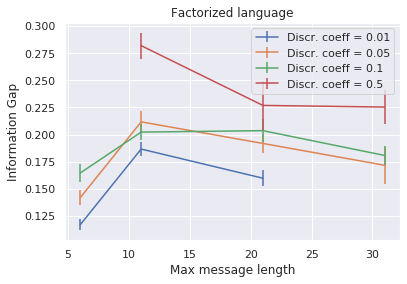

In [78]:
for d in discrs:
    means, std = [x[0] for x in results[d]], [x[1] for x in results[d]]
    
    plt.errorbar(xs, means, yerr=std, label=f'Discr. coeff = {d}')
    
plt.ylabel('Information Gap')
plt.xlabel('Max message length')
plt.title("Factorized language")
plt.legend()
plt.savefig("factorized_information_gap_d.pdf")
plt.show()


In [57]:
data = []

with open('/private/home/kharitonov/work/EGG/egg/zoo/language_bottleneck/explain/ig_factorized.json', 'r') as fin:
    for line in fin:
        data.append(json.loads(line))

In [58]:
filtered = []

for l in data:
    if l['receiver_cell'] != 'gru' or l['sender_cell'] != 'factorized':
        continue
    filtered.append(l)
print(len(l))

38


In [59]:
xs = [6, 11, 21]
vocab_sizes = [8, 16]

results = dict((z, []) for z in vocab_sizes)

for vocab_size in vocab_sizes:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['vocab_size'] == vocab_size]
        info_gap = [x['mean_information_gap'] for x in slice]
        
        
        results[vocab_size].append((np.mean(info_gap), np.std(info_gap) / len(info_gap)))

In [60]:
results

{8: [(0.22170923054218292, 0.024883118860697793),
  (0.2441060785204172, 0.019364498954180343),
  (0.22781609371304512, 0.05299273692071438)],
 16: [(0.12259437640508015, 0.0075105089481113975),
  (0.1524524547159672, 0.007567916427108116),
  (0.09234304808908039, 0.0035344816988312367)]}

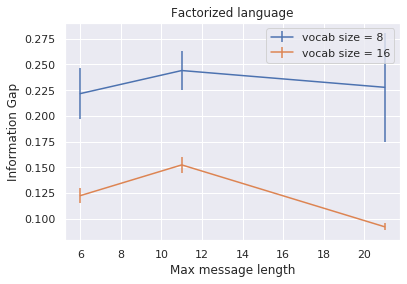

In [61]:
for vocab_size in vocab_sizes:
    means, std = [x[0] for x in results[vocab_size]], [x[1] for x in results[vocab_size]]
    
    plt.errorbar(xs, means, yerr=std, label=f'vocab size = {vocab_size}')
    
plt.ylabel('Information Gap')
plt.xlabel('Max message length')
plt.title("Factorized language")
plt.legend()
plt.savefig("factorized_information_gap.pdf")
plt.show()


In [31]:
data = []

with open('/private/home/kharitonov/work/EGG/egg/zoo/language_bottleneck/explain/explain_symbol.json', 'r') as fin:
    for line in fin:
        data.append(json.loads(line))

In [32]:
filtered = []

for l in data:
    if l['receiver_cell'] != 'gru' or l['sender_cell'] != 'gru':
        continue
    filtered.append(l)
print(len(l))

38


In [33]:
xs = [11, 21, 31]
vocab_sizes = [8, 16]

results = dict((z, []) for z in vocab_sizes)

for vocab_size in vocab_sizes:
    for max_len in xs:
        slice = [x for x in filtered if x['max_len'] == max_len and x['vocab_size'] == vocab_size]
        bits_needed = [x['ave_bits_needed'] for x in slice]
        
        print(vocab_size, max_len, bits_needed)
        
        results[vocab_size].append((np.mean(bits_needed), np.std(bits_needed) / len(bits_needed)))

8 11 [8, 8, 8]
8 21 [8, 8, 8, 7.95]
8 31 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
16 11 [8, 8, 8]
16 21 [8, 8, 8, 8, 7.95]
16 31 [8, 8, 8, 8]


In [34]:
results

{8: [(8.0, 0.0), (7.9875, 0.005412658773652722), (8.0, 0.0)],
 16: [(8.0, 0.0), (7.99, 0.003999999999999985), (8.0, 0.0)]}

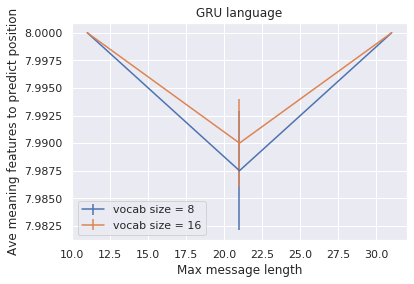

In [35]:
for vocab_size in vocab_sizes:
    means, std = [x[0] for x in results[vocab_size]], [x[1] for x in results[vocab_size]]
    
    plt.errorbar(xs, means, yerr=std, label=f'vocab size = {vocab_size}')
    
plt.ylabel('Ave meaning features to predict position')
plt.xlabel('Max message length')
plt.title("GRU language")
plt.legend()
plt.savefig("gru_explain_symbol.pdf")
plt.show()
